In [2]:
import qiskit
print(qiskit.__version__)
import qiskit.qasm2 as qasm

2.2.3


In [3]:
import re

qelib1_pattern = r'(include\s+"qelib1\.inc";)'

rccx_snippet = """
gate rccx a, b, c {
    u2(0, pi) c;
    u1(pi/4) c;
    cx b, c;
    u1(-pi/4) c;
    cx a, c;
    u1(pi/4) c;
    cx b, c;
    u1(-pi/4) c;
    u2(0, pi) c;
}"""

rzz_snippet = """
gate rzz(theta) a, b {
    cx a, b;
    u1(theta) b;
    cx a, b;
}"""

cry_snippet = """
gate cry(theta) a, b {
    u3(theta/2, 0, 0) b;
    cx a, b;
    u3(-theta/2, 0, 0) b;
    cx a, b;
}"""

swap_snippet = """
gate swap a, b {
    cx a, b;
    cx b, a;
    cx a, b;
}"""

p_snippet = """
gate p(lambda) q {
    u1(lambda) q;
}"""

cswap_snippet = """
gate cswap a, b, c {
    cx c, b;
    ccx a, b, c;
    cx c, b;
}"""

# Convert all u -> u3 to eliminate parsing errors
def standardize_qasm_gates(qasm_content):
    
    if 'rccx' in qasm_content and 'gate rccx' not in qasm_content:
    
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + rccx_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending rccx gate definition at the beginning.")
            qasm_content = rccx_snippet + "\n" + qasm_content

    if 'rzz' in qasm_content and 'gate rzz' not in qasm_content:
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + rzz_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending rzz gate definition at the beginning.")
            qasm_content = rzz_snippet + "\n" + qasm_content

    if 'cry' in qasm_content and 'gate cry' not in qasm_content:
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + cry_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending cry gate definition at the beginning.")
            qasm_content = cry_snippet + "\n" + qasm_content

    if 'swap' in qasm_content and 'gate swap' not in qasm_content:
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + swap_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending swap gate definition at the beginning.")
            qasm_content = swap_snippet + "\n" + qasm_content

    if 'p(' in qasm_content and 'gate p' not in qasm_content:
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + p_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending p gate definition at the beginning.")
            qasm_content = p_snippet + "\n" + qasm_content

    if 'cswap' in qasm_content and 'gate cswap' not in qasm_content:
        if re.search(qelib1_pattern, qasm_content):
            qasm_content = re.sub(qelib1_pattern, r'\1' + cswap_snippet, qasm_content)
        else:
            print("Warning -- qelib1.inc not found; appending cswap gate definition at the beginning.")
            qasm_content = cswap_snippet + "\n" + qasm_content

    qasm_content = re.sub(r'\b(u|U)\s*\(', 'u3(', qasm_content)
    qasm_content = re.sub(r'\bcp\s*\(', 'cu1(', qasm_content)

    return qasm_content

def process_qasm_file(path):
    with open(path, 'r') as f:
        raw_qasm = f.read()
    
    clean_qasm = standardize_qasm_gates(raw_qasm)
    
    with open(path, 'w') as f:
        f.write(clean_qasm)
    print(f"Processed: {path}")

In [4]:
from pathlib import Path

# Loop through all circuits, correcting syntax
directory_path = Path('circuits')  # Use '.' for the current directory, or specify a path

for file_path in directory_path.iterdir():
    if file_path.is_file():
        file_name = str(file_path)
        process_qasm_file(file_name)
        print("Processed file:", file_name)

Processed: circuits\ae_indep_qiskit_130.qasm
Processed file: circuits\ae_indep_qiskit_130.qasm
Processed: circuits\ae_indep_qiskit_20.qasm
Processed file: circuits\ae_indep_qiskit_20.qasm
Processed: circuits\cutbell_n30_k6.qasm
Processed file: circuits\cutbell_n30_k6.qasm
Processed: circuits\dj_indep_qiskit_130.qasm
Processed file: circuits\dj_indep_qiskit_130.qasm
Processed: circuits\dj_indep_qiskit_15.qasm
Processed file: circuits\dj_indep_qiskit_15.qasm
Processed: circuits\dj_indep_qiskit_30.qasm
Processed file: circuits\dj_indep_qiskit_30.qasm
Processed: circuits\ghz_indep_qiskit_100.qasm
Processed file: circuits\ghz_indep_qiskit_100.qasm
Processed: circuits\ghz_indep_qiskit_130.qasm
Processed file: circuits\ghz_indep_qiskit_130.qasm
Processed: circuits\ghz_indep_qiskit_15.qasm
Processed file: circuits\ghz_indep_qiskit_15.qasm
Processed: circuits\ghz_indep_qiskit_30.qasm
Processed file: circuits\ghz_indep_qiskit_30.qasm
Processed: circuits\graphstate_indep_qiskit_15.qasm
Processed 

In [30]:
qc_arr = []
qc_names = []

for file_path in directory_path.iterdir():
    if file_path.is_file():
        file_name = str(file_path)
        qc_names.append(file_name[9:])
        qc_arr.append(qasm.load(file_name))
        print("Processed file:", file_name[9:])

Processed file: ae_indep_qiskit_130.qasm
Processed file: ae_indep_qiskit_20.qasm
Processed file: cutbell_n30_k6.qasm
Processed file: dj_indep_qiskit_130.qasm
Processed file: dj_indep_qiskit_15.qasm
Processed file: dj_indep_qiskit_30.qasm
Processed file: ghz_indep_qiskit_100.qasm
Processed file: ghz_indep_qiskit_130.qasm
Processed file: ghz_indep_qiskit_15.qasm
Processed file: ghz_indep_qiskit_30.qasm
Processed file: graphstate_indep_qiskit_15.qasm
Processed file: groundstate_large_indep_qiskit_14.qasm
Processed file: grover-noancilla_indep_qiskit_11.qasm
Processed file: grover-noancilla_indep_qiskit_7.qasm
Processed file: grover-v-chain_indep_qiskit_17.qasm
Processed file: grover-v-chain_indep_qiskit_7.qasm
Processed file: portfolioqaoa_indep_qiskit_10.qasm
Processed file: portfolioqaoa_indep_qiskit_17.qasm
Processed file: portfoliovqe_indep_qiskit_10.qasm
Processed file: portfoliovqe_indep_qiskit_18.qasm
Processed file: pricingcall_indep_qiskit_17.qasm
Processed file: qaoa_indep_qiski

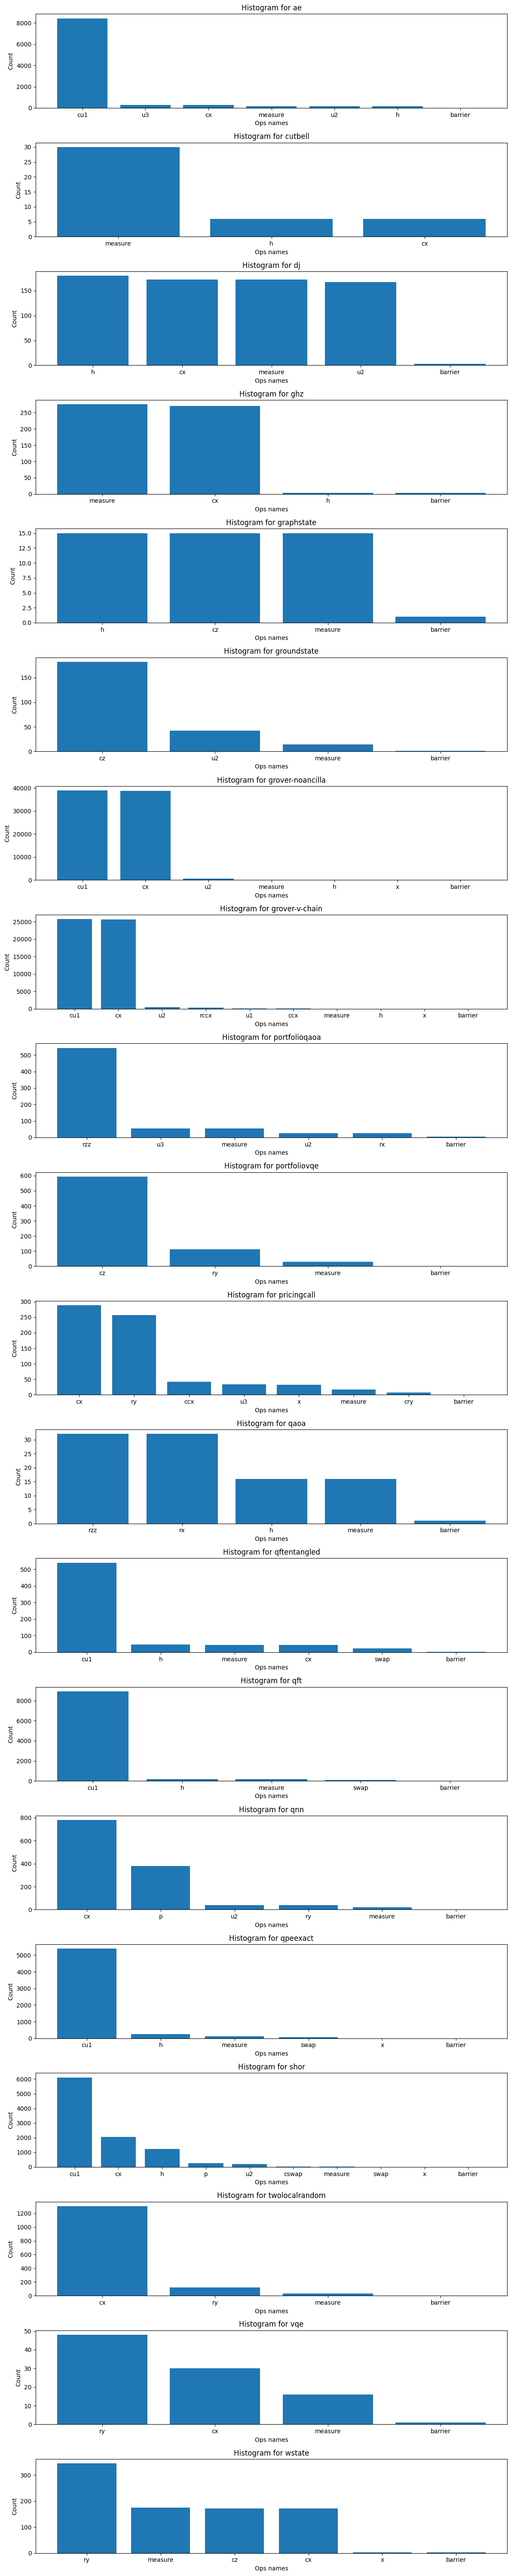

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Visualizations

family_dict = {}

i = 0
for file_path in directory_path.iterdir():
    filename = str(file_path)
    if filename == "circuits\\unused":
        continue

    qc = qc_arr[i]

    family = filename.split('_')[0][9:]
    ops_count = qc.count_ops()

    if family in family_dict:
        family_dict[family] = Counter(family_dict[family]) + Counter(ops_count)
    else:
        family_dict[family] = ops_count

    i += 1

fig, axs = plt.subplots(len(family_dict), 1, figsize=(12, len(family_dict)*3))

i = 0
for family in family_dict:

    ax = axs[i]

    ax.bar(list(family_dict[family].keys()), list(family_dict[family].values()))
    ax.set_xlabel('Ops names')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram for {family}')

    i += 1

fig.tight_layout()

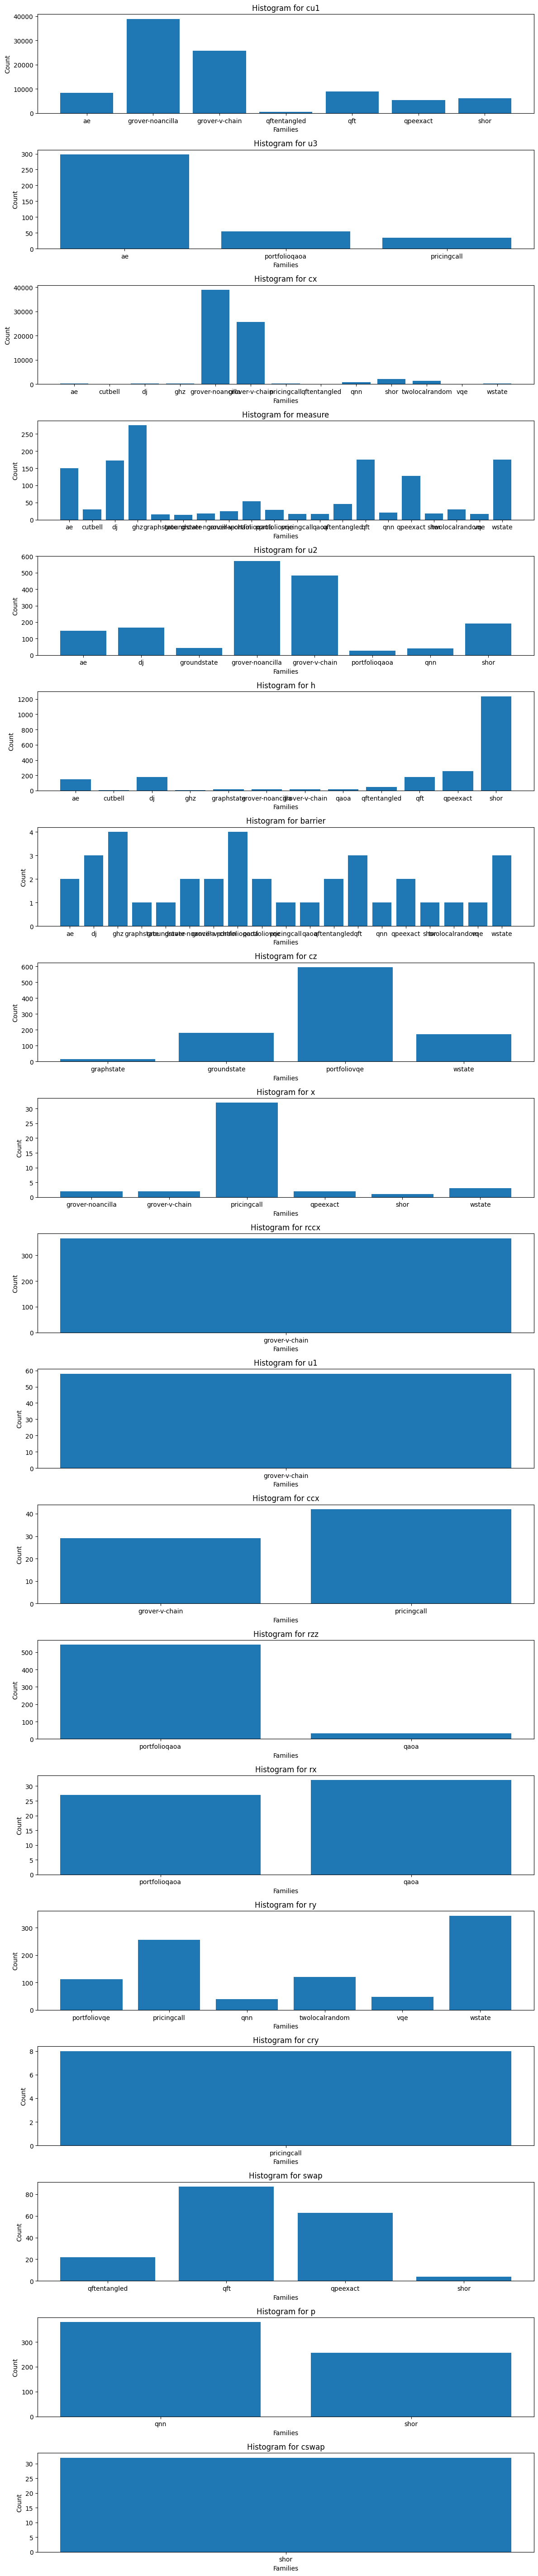

In [ ]:
# Same visualizations but for each gate

gate_dict = {}

for family, gate_counts in family_dict.items():
    for gate, count in gate_counts.items():
        if gate not in gate_dict:
            gate_dict[gate] = {}
        gate_dict[gate][family] = count

# Now gate_dict has gates as keys, with dicts of families and counts
fig, axs = plt.subplots(len(gate_dict), 1, figsize=(12, len(gate_dict)*3))

i = 0
for gate in gate_dict:

    ax = axs[i]

    ax.bar(list(gate_dict[gate].keys()), list(gate_dict[gate].values()))
    ax.set_xlabel('Families')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram for {gate}')

    i += 1

fig.tight_layout()

In [31]:
import pandas as pd
import math
from qiskit.circuit import Barrier

# Extract features from each quantum circuit
eps = 1e-10

# Define weights for different gate types
runtime_weights = {
    'cu1': 15,
    'cx': 10,
    'h': 1,
    'u2': 1.5,
    'measure': 2.,
    'cz': 10.,
    'ry': 1.5,
    'p': 15.,
    'rzz': 15.,
    'u3': 1.5,
    'rccx': 40.,
    'swap': 30.,
    'ccx': 70.,
    'rx': 1.5,
    'u1': 1.5,
    'x': 1.,
    'cswap': 70.,
    'cry': 25.   
}

magic_weights = {
    'cu1': 2.0,
    'u2': 2.0,
    'ry': 2.0,
    'rzz': 3.0,
    'u3': 1.0,
    'rccx': 3.0,
    'ccx': 7.0,
    'rx': 1.0,
    'u1': 1.0,
    'cswap': 7.0,
    'cry': 2.0
}

conditional_gates = ['cu1', 'u2', 'ry', 'rzz', 'u3', 'rccx', 'rx', 'u1', 'cry']

# Functions to calculate gate weights

def calc_runtime_weight(instr):
    gate_name = instr.operation.name
    runtime_weight = runtime_weights.get(gate_name, 0)

    if gate_name in conditional_gates:
        max_runtime_weight = 0

        for param in instr.operation.params:
            indicator = (param / (2*math.pi)) % 1.

            if abs(indicator) < eps:
                weight = runtime_weight / 1.5
            else:
                weight = runtime_weight

            if weight > max_runtime_weight:
                max_runtime_weight = weight

        runtime_weight = max_runtime_weight

    return runtime_weight

def calc_magic_weight(instr):
    gate_name = instr.operation.name
    magic_weight = magic_weights.get(gate_name, 0)

    if gate_name in conditional_gates:
        max_magic_weight = 0

        for param in instr.operation.params:
            indicator = (param / (2*math.pi)) % 1.

            if abs(indicator) < eps:
                weight = 0
            elif abs(indicator - 0.5) < eps:
                weight = 1
            else:
                weight = 3

            if weight > max_magic_weight:
                max_magic_weight = weight

        magic_weight = max_magic_weight

    return magic_weight

def calculate_entropy_contribution(qc, instr):

    qb_indices = [qc.find_bit(qb).index for qb in instr.qubits]

    contribution = max(qb_indices) - min(qb_indices)
    return contribution

def extract_features(qc):
    num_qubits = qc.num_qubits
    depth = qc.depth()

    qc_data = [instr for instr in qc.data if not isinstance(instr.operation, Barrier)]

    gate_counts_by_num_qb = Counter([instr.operation.num_qubits for instr in qc_data])
    mul_qb_gate_count = sum(v for k, v in gate_counts_by_num_qb.items() if k > 1)
    mul_qb_gate_density = mul_qb_gate_count / (num_qubits * depth)

    runtime_weight_sum = 0
    magic_weight_sum = 0
    for instr in qc_data:
        runtime_weight_sum += calc_runtime_weight(instr)
        magic_weight_sum += calc_magic_weight(instr)
    
    weighted_gate_count = runtime_weight_sum
    magic_metric = magic_weight_sum

    entanglement_metric = 0

    for instr in qc_data:
        if instr.operation.num_qubits > 1:
            entanglement_metric += calculate_entropy_contribution(qc, instr)

    qc_features = {
        'num_qubits': num_qubits,
        'weighted_gate_count': weighted_gate_count,
        'depth': depth,
        'mul_qb_gate_density': mul_qb_gate_density,
        'entanglement_metric': entanglement_metric,
        'magic_metric': magic_metric
    }
    return qc_features

feature_data = []

for [qc, name] in zip(qc_arr, qc_names):
    features = extract_features(qc)
    features['name'] = name
    feature_data.append(features)

df_features = pd.DataFrame(feature_data)
print(df_features)

    num_qubits  weighted_gate_count  depth  mul_qb_gate_density  \
0          130        108212.000000    774             0.084615   
1           20          3091.000000    114             0.091667   
2           30           126.000000      3             0.066667   
3          130          1837.000000    132             0.007517   
4           15           202.000000     17             0.054902   
5           30           414.500000     32             0.030208   
6          100          1191.000000    101             0.009802   
7          130          1551.000000    131             0.007575   
8           15           171.000000     16             0.058333   
9           30           351.000000     31             0.031183   
10          15           195.000000     10             0.100000   
11          14          1911.000000     43             0.302326   
12          11        958908.000000  76677             0.090877   
13           7         14091.000000   1124             0.14184

In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization of features

min_max_columns = ['num_qubits', 'mul_qb_gate_density']
standard_columns = ['weighted_gate_count', 'depth', 'entanglement_metric', 'magic_metric']

# Apply log transformation to standardization columns
df_features[standard_columns] = np.log10(df_features[standard_columns] + 1e-10)

min_max_scaler = MinMaxScaler()
standard_scalar = StandardScaler()

df_scaled = pd.DataFrame()
df_scaled['name'] = df_features['name']
df_scaled[standard_columns] = standard_scalar.fit_transform(df_features[standard_columns])
df_scaled[min_max_columns] = min_max_scaler.fit_transform(df_features[min_max_columns])
print(df_scaled)

                                      name  weighted_gate_count     depth  \
0                 ae_indep_qiskit_130.qasm             1.526904  0.907182   
1                  ae_indep_qiskit_20.qasm            -0.074903 -0.005393   
2                      cutbell_n30_k6.qasm            -1.516497 -1.738512   
3                 dj_indep_qiskit_130.qasm            -0.309327  0.064456   
4                  dj_indep_qiskit_15.qasm            -1.303866 -0.912065   
5                  dj_indep_qiskit_30.qasm            -0.980042 -0.610702   
6                ghz_indep_qiskit_100.qasm            -0.504548 -0.063080   
7                ghz_indep_qiskit_130.qasm            -0.385567  0.060832   
8                 ghz_indep_qiskit_15.qasm            -1.378922 -0.940950   
9                 ghz_indep_qiskit_30.qasm            -1.054955 -0.625828   
10         graphstate_indep_qiskit_15.qasm            -1.319755 -1.164882   
11  groundstate_large_indep_qiskit_14.qasm            -0.291535 -0.469929   

In [33]:
# Export feature dataframe to file

df_scaled.to_csv('qasm_features_scaled.csv', index=False)